<a href="https://colab.research.google.com/github/perkeje/find_the_statue_cnn/blob/main/Copy_of_FindTheStatue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-19 04:35:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-19 04:35:22 (47.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import load_and_prep_image,unzip_data,create_tensorboard_callback,plot_loss_curves, compare_historys

In [ ]:
tf.version.VERSION

'2.8.2'

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/ZavrssniRad/train"):
  print(f"There are {len(dirnames)} dirs and {len(filenames)} images in our{dirpath}")

There are 9 dirs and 0 images in our/content/drive/MyDrive/ZavrssniRad/train
There are 0 dirs and 49 images in our/content/drive/MyDrive/ZavrssniRad/train/5
There are 0 dirs and 45 images in our/content/drive/MyDrive/ZavrssniRad/train/6
There are 0 dirs and 49 images in our/content/drive/MyDrive/ZavrssniRad/train/8
There are 0 dirs and 45 images in our/content/drive/MyDrive/ZavrssniRad/train/0
There are 0 dirs and 43 images in our/content/drive/MyDrive/ZavrssniRad/train/2
There are 0 dirs and 44 images in our/content/drive/MyDrive/ZavrssniRad/train/3
There are 0 dirs and 42 images in our/content/drive/MyDrive/ZavrssniRad/train/7
There are 0 dirs and 63 images in our/content/drive/MyDrive/ZavrssniRad/train/1
There are 0 dirs and 39 images in our/content/drive/MyDrive/ZavrssniRad/train/4


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SHAPE = (256,256)
BATCH_SIZE = 16

all_dir = "/content/drive/MyDrive/ZavrssniRad/train"
test_dir = "/content/drive/MyDrive/ZavrssniRad/test"

                         

train_data = tf.keras.utils.image_dataset_from_directory(all_dir,
                                              shuffle = True,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical",
                                              crop_to_aspect_ratio=True,
                                              seed=42,
                                              validation_split=0.1,
                                              subset='training',
                                              )

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                              shuffle = True,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical",
                                              crop_to_aspect_ratio=True,
                                              seed=42,
                                              validation_split=0.1,
                                              subset='validation',
)


Found 419 files belonging to 9 classes.
Using 378 files for training.
Found 1018 files belonging to 9 classes.
Using 101 files for validation.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


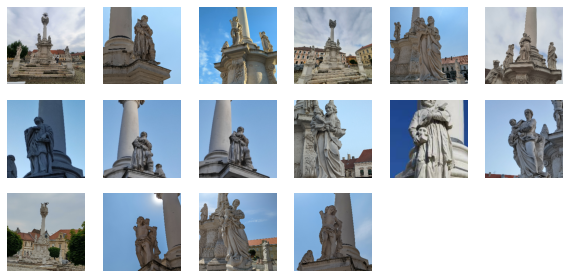

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")



In [ ]:

data_augmentation = Sequential([
  preprocessing.Rescaling(1./255)
], name="data_augmentation")



In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape=(256,256,3),name="input_layer")
x= data_augmentation(inputs)
x= base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data.class_names),activation="softmax")(x)
model = tf.keras.Model(inputs,outputs)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 256, 256, 3)      0         
 al)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_avg_pool_layer (Glob  (None, 512)              0         
 alAveragePooling2D)                                             
                                                                 
 dense (Dense)               (None, 9)                 4617      
                                                                 
Total params: 14,719,305
Trainable params: 4,617
Non-trainabl

In [ ]:
checkpoint_path="checkpoint_1"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 =model.fit(train_data,
                     epochs=5, 
                     steps_per_epoch= len(train_data),
                     validation_data=test_data,
                     validation_steps=int(.5*len(test_data)),
                     callbacks=[checkpoint_callback]
                     )

Epoch 1/5
24/24 [==============================] - 98s 3s/step - loss: 2.2968 - accuracy: 0.1640 - val_loss: 2.1534 - val_accuracy: 0.2917
Epoch 2/5
24/24 [==============================] - 17s 479ms/step - loss: 2.0633 - accuracy: 0.3095 - val_loss: 2.0870 - val_accuracy: 0.1458
Epoch 3/5
24/24 [==============================] - 17s 484ms/step - loss: 1.9584 - accuracy: 0.3968 - val_loss: 2.0015 - val_accuracy: 0.3542
Epoch 4/5
24/24 [==============================] - 18s 522ms/step - loss: 1.8639 - accuracy: 0.5053 - val_loss: 1.8618 - val_accuracy: 0.4167
Epoch 5/5
24/24 [==============================] - 17s 484ms/step - loss: 1.7768 - accuracy: 0.5847 - val_loss: 1.7990 - val_accuracy: 0.5625


In [ ]:
feature_extraction_model = model.evaluate(test_data)
feature_extraction_model

7/7 [==============================] - 3s 252ms/step - loss: 1.8245 - accuracy: 0.5644


[1.8245487213134766, 0.5643564462661743]

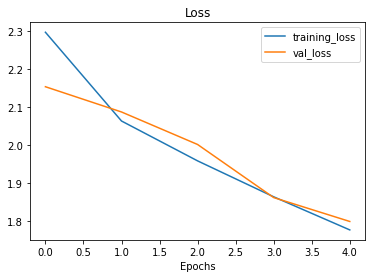

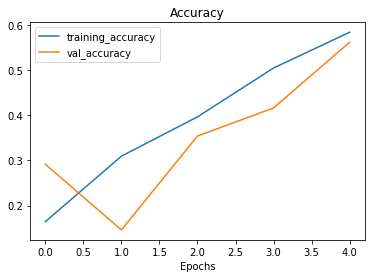

In [ ]:
plot_loss_curves(history_1)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-15]:
  layer.trainable = False
  model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 9

history_fine_tuned = model.fit(train_data,
                      epochs=fine_tune_epochs,
                      validation_data=test_data,
                      validation_steps=int(.5*len(test_data)),
                      initial_epoch=history_1.epoch[-1])

Epoch 5/9
24/24 [==============================] - 23s 614ms/step - loss: 1.3257 - accuracy: 0.5026 - val_loss: 0.8298 - val_accuracy: 0.5625
Epoch 6/9
24/24 [==============================] - 18s 549ms/step - loss: 0.5931 - accuracy: 0.7646 - val_loss: 0.3119 - val_accuracy: 0.8958
Epoch 7/9
24/24 [==============================] - 19s 556ms/step - loss: 0.1865 - accuracy: 0.9259 - val_loss: 0.1442 - val_accuracy: 0.9167
Epoch 8/9
24/24 [==============================] - 20s 555ms/step - loss: 0.1086 - accuracy: 0.9656 - val_loss: 0.1799 - val_accuracy: 0.9167
Epoch 9/9
24/24 [==============================] - 18s 549ms/step - loss: 0.0901 - accuracy: 0.9656 - val_loss: 0.3484 - val_accuracy: 0.9167


In [ ]:
fine_tuned_model = model.evaluate(test_data)
fine_tuned_model

7/7 [==============================] - 2s 98ms/step - loss: 0.3468 - accuracy: 0.9307


[0.3468363285064697, 0.9306930899620056]

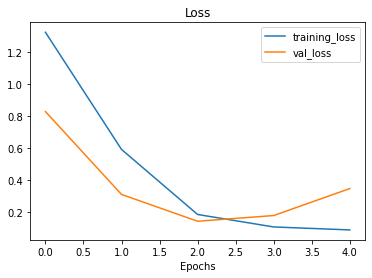

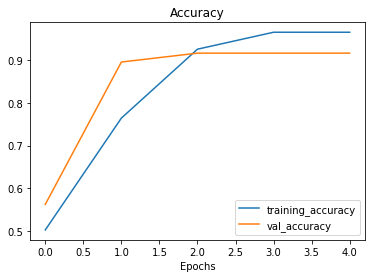

In [ ]:
plot_loss_curves(history_fine_tuned)

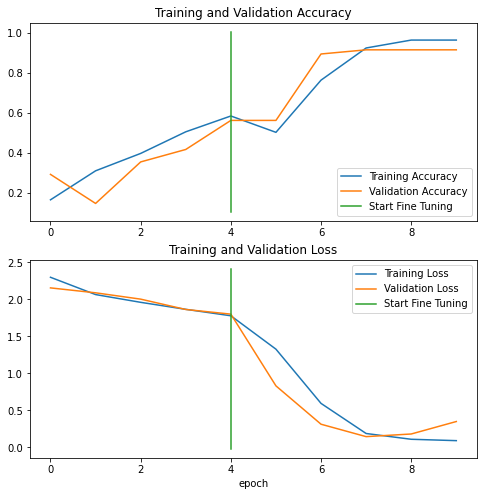

In [ ]:
compare_historys(history_1,
                 history_fine_tuned,
                 5)

In [ ]:
model.evaluate(train_data)

24/24 [==============================] - 15s 392ms/step - loss: 0.0262 - accuracy: 0.9974


[0.026184195652604103, 0.9973545074462891]

In [ ]:
def load_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  h, w = img.shape[-3], img.shape[-2]
  if h > w:
      cropped_image = tf.image.crop_to_bounding_box(img, (h - w) // 2, 0, w, w)
  else:
      cropped_image = tf.image.crop_to_bounding_box(img, 0, (w - h) // 2, h, h)
  img =  tf.image.resize(cropped_image, (256, 256))
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
import matplotlib.pyplot as plt

img = load_image("/content/drive/MyDrive/ZavrssniRad/train/4/PXL_20220807_112701890.jpg",img_shape=256,scale =False)
model.predict(tf.expand_dims(img,0)).argmax()

4

In [ ]:
# from keras.models import load_model

# model.save('statue-recognizer.tf')
# !zip -r /content/statue-recognizer.zip /content/statue-recognizer.tf

In [ ]:
# from google.colab import files
# files.download("/content/statue-recognizer.zip")